In [87]:
import matplotlib as plt
import pandas as pd
plt.__version__
movies = pd.read_csv('movies.csv')

In [88]:
movies.head()

,Movie Title,Runtime,Genre,Award Wins,Award Nominations,Box Office,Rated,Language,Director
0,Parasite,132,"Drama, Thriller",4,306,53369749,R,"['Korean', 'English']",Bong Joon Ho
1,Green Book,130,"Biography, Comedy, Drama",3,58,85080171,PG-13,"['English', 'Italian', 'Russian', 'German']",Peter Farrelly
2,The Shape of Water,123,"Drama, Fantasy, Romance",4,136,63859435,R,"['English', 'American Sign ', 'Russian', 'Fren...",Guillermo del Toro
3,Moonlight,111,Drama,3,231,27854932,R,['English'],Barry Jenkins
4,Spotlight,129,"Biography, Crime, Drama",2,124,45055776,R,['English'],Tom McCarthy


## (Graph) What was the runtime for each movie?

<Axes: xlabel='Movie', ylabel='Runtime (mins)'>

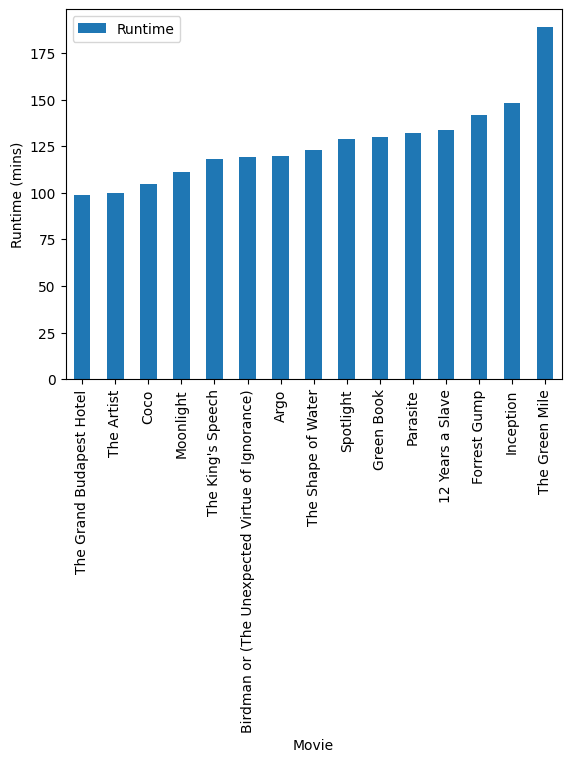

In [89]:
runtimes = movies.sort_values(by='Runtime', ascending=True)
runtimes.plot.bar(x='Movie Title', y='Runtime', xlabel='Movie', ylabel='Runtime (mins)')

## What movie had the longest runtime?

In [90]:
sort_time = movies.sort_values(by='Runtime', ascending=False)
long_time = sort_time.iloc[0]
print("The longest movie is:", long_time["Movie Title"])

The longest movie is: The Green Mile


## Is there any relationship between the length of the movie (runtime) and the number of awards a movie won?

<Axes: title={'center': 'Relationship between runtimes and awards won.'}, xlabel='Runtime', ylabel='Award Wins'>

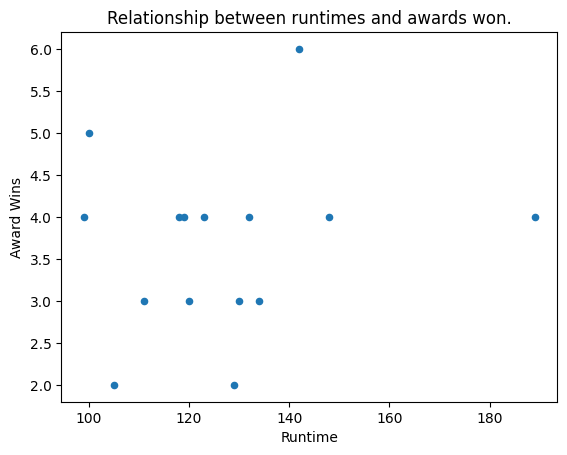

In [91]:
len_movie = movies.sort_values(by='Runtime', ascending=False)
len_movie.plot.scatter(x='Runtime', y='Award Wins', title='Relationship between runtimes and awards won.')

## (Graph) How many awards and nominations did each movie receive?

<Axes: title={'center': 'Awards and Nominations won for each movie'}, xlabel='Movie Title'>

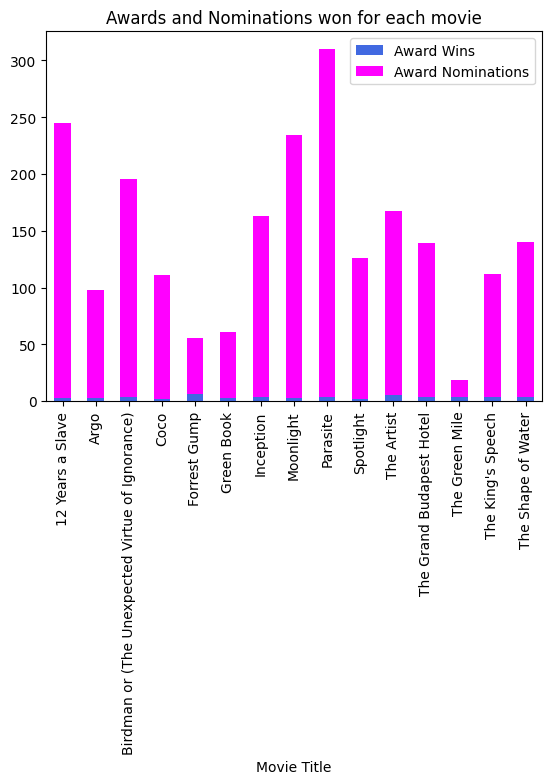

In [92]:
awards_noms = movies.groupby('Movie Title').sum().loc[:, ['Award Wins', 'Award Nominations']]
award_colors = {
    'Award Wins': 'royalblue',
    'Award Nominations': 'magenta'}
awards_noms.plot(kind= 'bar', title='Awards and Nominations won for each movie', stacked=True, color=award_colors)

## Is there a relationship between the amount of box office earnings a movie had and the amount of total nominations the movie received (total nominations = awards wins + award nominations)?

<Axes: title={'center': 'Relationship between Box Office earnings and total nominations.'}, xlabel='Box Office', ylabel='TotalNominations'>

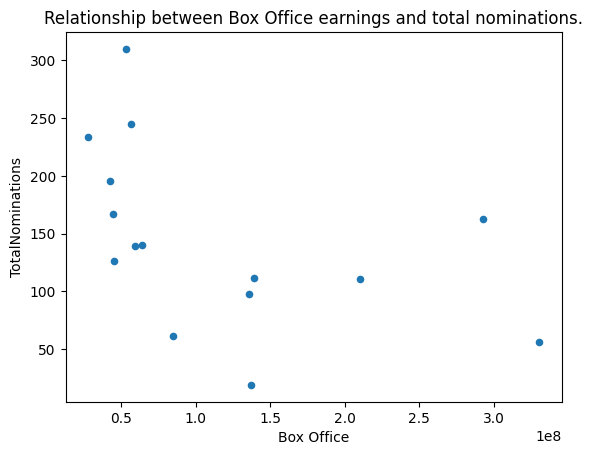

In [93]:
movies['TotalNominations'] = movies['Award Wins'] + movies['Award Nominations']
box_earnings = movies.sort_values(by='Box Office', ascending=False)
box_earnings.plot.scatter(x='Box Office', y='TotalNominations', title='Relationship between Box Office earnings and total nominations.')

## Is there a relationship between box office earnings and movie runtimes?

<Axes: title={'center': 'Relationship between Box Office earnings and runtimes.'}, xlabel='Box Office', ylabel='Runtime'>

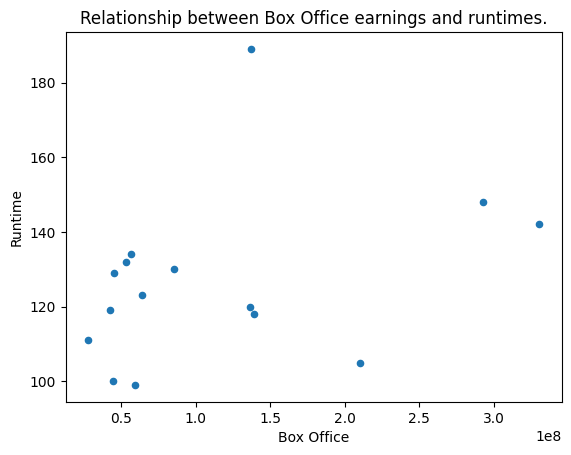

In [94]:
box_office = movies.sort_values(by='Box Office', ascending=False)
box_office.plot.scatter(x='Box Office', y='Runtime', title='Relationship between Box Office earnings and runtimes.')

## (Graph) How much did each movie earn at the box office?

<Axes: title={'center': 'Amount each movie made at the box office.'}, xlabel='Movie Title'>

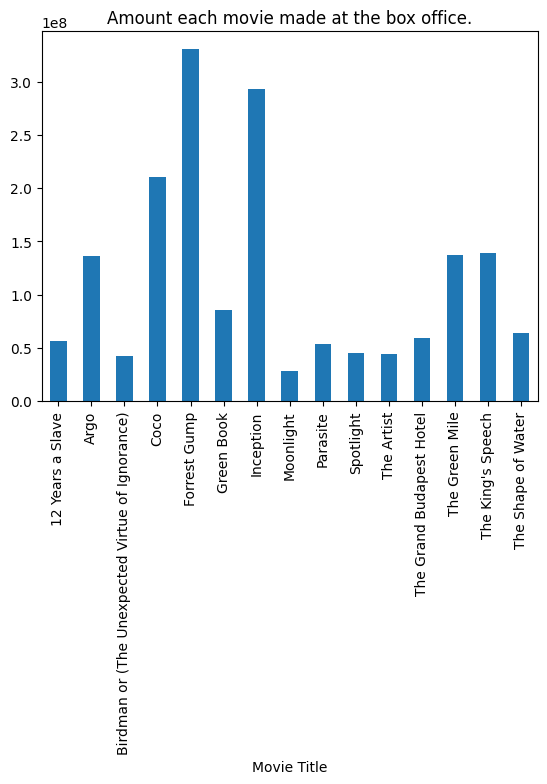

In [95]:
movie_earnings = movies.groupby('Movie Title').sum()['Box Office']
movie_earnings.plot(kind= 'bar', title='Amount each movie made at the box office.')

## (Graph) What is the total count of each genre present in the dataset? (How many times does fantasy, drama, adventure, etc. show up)

In [98]:
movies['Genre'] = movies['Genre'].str.split(', ')
total_genres = movies['Genre'].explode()
genre_counts = total_genres.value_counts()
ax = genre_counts.plot(kind='bar', color='green', xlabel='Genre', ylabel='Count', title='Total Count for Movies by Genre')
ax.set_xticks(range(len(genre_counts)))
ax.set_xticks(genre_counts.index, rotation=45)



AttributeError: Can only use .str accessor with string values!